In [35]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import psycopg2
    
%matplotlib inline

In [42]:
#https://blog.panoply.io/connecting-jupyter-notebook-with-postgresql-for-python-data-analysis
username = 'postgres'
password = '.'
#I actually have a password that I loaded in but removed it for saving purposes.
host = '127.0.0.1'
port = '5432'
database = 'EmployeeSQL'

db_url = 'postgresql://{}:{}@{}:{}/{}'.format(username, password, host, port, database)

In [44]:
engine = create_engine(db_url)
conn = engine.connect()

In [47]:
#read the employees sql
employee = pd.read_sql("SELECT * FROM employees", conn)
employee.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [49]:
#read the salary sql
salary = pd.read_sql("SELECT * FROM salaries", conn)
salary.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [84]:
#merge the employee and salaries data
employee_salary = pd.merge(employee, salary, on='emp_no')
employee_salary.rename(columns={'emp_title_id': 'title_id'}, inplace=True)
employee_salary

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772


In [51]:
import numpy as np

(array([ 20000.,  40000.,  60000.,  80000., 100000., 120000., 140000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

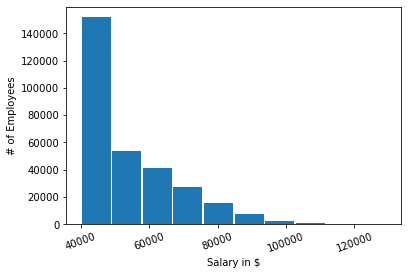

In [96]:
#create a histogram to visualize the most common salary ranges for employees
plt.hist(employee_salary['salary'], rwidth=0.95)
plt.xlabel("Salary in $")
plt.ylabel("# of Employees")
plt.xticks(rotation=20)

In [56]:
#display the title table
title = pd.read_sql("SELECT * FROM titles", conn)
title.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [86]:
type(title)

NoneType

In [88]:
emp_sal_title = pd.read_sql("SELECT * FROM bonus_2", conn)
emp_sal_title.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,10005,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,78228,Staff
1,10010,e0002,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,72488,Engineer
2,10011,s0001,1953-11-07,Mary,Sluis,F,1990-01-22,42365,Staff
3,10013,s0002,1963-06-07,Eberhardt,Terkki,M,1985-10-20,40000,Senior Staff
4,10017,s0001,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,71380,Staff


In [127]:
#find the mean salary by title
mean_salary = emp_sal_title.groupby('title')['salary'].mean().map("{:,.2f}".format).sort_values(ascending=False)
mean_salary

title
Senior Staff          58,550.17
Staff                 58,465.38
Manager               51,531.04
Technique Leader      48,582.90
Assistant Engineer    48,564.43
Engineer              48,535.34
Senior Engineer       48,506.80
Name: salary, dtype: object

In [161]:
#create a bar chart of average salary by title
x_axis = emp_sal_title.groupby('title')['salary'].mean().sort_values(ascending=False)

Text(0.5, 1.0, 'Average Salary in $ per Title')

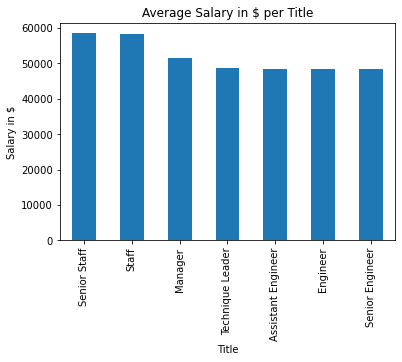

In [164]:
#plotting and formatting the bar chart
x_axis.plot.bar()
plt.xlabel('Title')
plt.ylabel('Salary in $')
plt.title('Average Salary in $ per Title')

In [171]:
#finding my information; emp_no 499942
me = emp_sal_title[emp_sal_title['emp_no'] == 499942]
me
#I am waaaaaaaay underpaid!!!

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
37455,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,40000,Technique Leader
